In [ ]:
#%matplotlib notebook

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from skimage.filters import gaussian

import math

from glob import glob
from scipy import ndimage
from skimage import img_as_float, io
import imageio
import json

In [4]:
big_img = img_as_float(io.imread('C:/Users/jv92c/Documents/mFISH/sample_data/DAPI_Overview.tif'))

In [5]:
x, y = big_img.shape
print(x/2048) # how many horizontal tiles
print(y/2048) # how many vertical tiles

x_step = math.ceil(x/2048)
y_step = math.ceil(y/2048)

print(x_step)
print(y_step)

10.5
9.5498046875
11
10


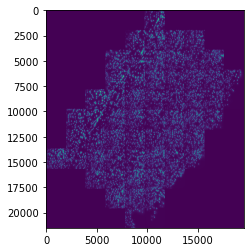

In [6]:
plt.imshow(big_img)

using a 2048 x 2048 pixel FOV, we will slide across the image to capture each fragment. Each image tile should have a small overlap with adjacent tiles, for later use in identifying nuclei that are relegated to the tile edges. This should work similar to a sliding window, but should only need array slicing to keep things simple.

In [ ]:
# numpy meshgrid

In [7]:
test_img = np.random.rand(20000,20000)
test_img = gaussian(test_img,3)
test_img[test_img<.7*np.max(test_img)]=0

In [12]:
#slice intervals
tile_step = 2000

#size of the 2D slice
#also determines the overlap between FOVs for use in stitching of edge objects
tile_size = 2048

In [9]:
#image input
sample = test_img

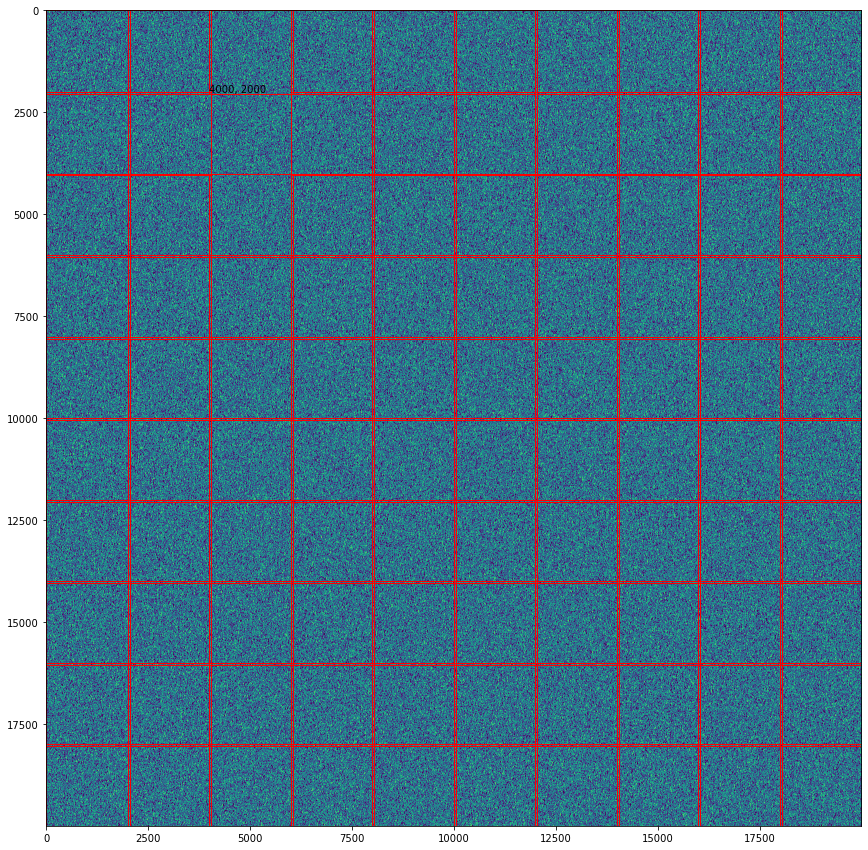

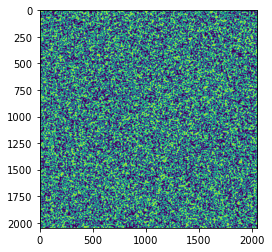

In [13]:
#range in the x-direction determined by width of image; row length
tile_range_r = np.arange(0, sample.shape[0],tile_step)

#range in the y-direction determined by height; column height
tile_range_c = np.arange(0, sample.shape[1],tile_step)

xs, ys = np.meshgrid(tile_range_r, tile_range_c)

selected = 12

plt.figure(figsize= [15,15])
plt.imshow(sample)
ax = plt.gca()

for ii, thing in enumerate(xs.ravel()):
    
    #print(str(xs.ravel()[ii]) + " "+str(ys.ravel()[ii]))
    r_min = ys.ravel()[ii]
    r_max = np.min([ys.ravel()[ii]+ tile_size, sample.shape[1]-1])
    c_min = xs.ravel()[ii]
    c_max = np.min([xs.ravel()[ii]+ tile_size, sample.shape[0]-1])
    sub_image = sample[r_min:r_max,c_min:c_max]

    # confirm that this is doing the right thing....
    if ii == selected:
        rect = Rectangle((c_min,r_min),c_max-c_min, r_max-r_min, linewidth=1, edgecolor='b', facecolor='none')
        ax.text(c_min,r_min, str(c_min)+", "+str(r_min))
        # add a figure below that will show the subimage.  
        plt.figure()
        plt.imshow(sub_image)
    else:
        rect = Rectangle((c_min,r_min), c_max-c_min, r_max-r_min, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
#    time.sleep(2)


In [14]:
sample = big_img

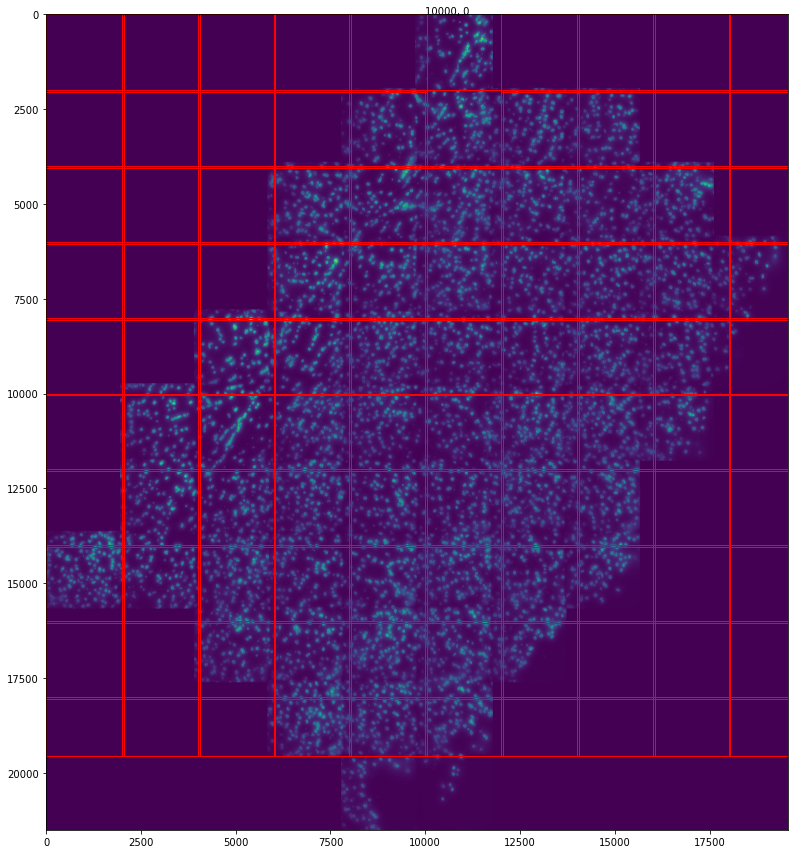

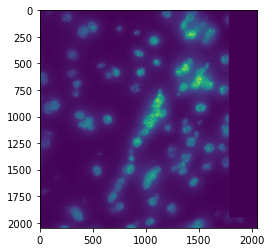

In [17]:
#range in the x-direction determined by width of image; row length
tile_range_r = np.arange(0, sample.shape[0], tile_step)

#range in the y-direction determined by height; column height
tile_range_c = np.arange(0, sample.shape[1], tile_step)

xs, ys = np.meshgrid(tile_range_r, tile_range_c)

current_selection = 5

plt.figure(figsize= [15,15])
plt.imshow(sample)
ax = plt.gca()

for ii, thing in enumerate(xs.ravel()):
    
    #this is to display the overall grid that will overlay the sample image
    r_min = ys.ravel()[ii]
    r_max = np.min([ys.ravel()[ii]+ tile_size, sample.shape[1]-1])
    c_min = xs.ravel()[ii]
    c_max = np.min([xs.ravel()[ii]+ tile_size, sample.shape[0]-1])
    sub_image = sample[r_min:r_max,c_min:c_max]

    #this portion can be repurposed into what will eventually save the subimages and their spatial coordinates to a json file
    #the key is to have the current_selection figures be saved as they are generated iteratively
    if ii == current_selection:
        rect = Rectangle((c_min,r_min),c_max-c_min, r_max-r_min, linewidth=1, edgecolor='b', facecolor='none')
        ax.text(c_min,r_min, str(c_min)+", "+str(r_min))
        # add a figure below that will show the subimage.  
        plt.figure()
        plt.imshow(sub_image)
    else:
        rect = Rectangle((c_min,r_min), c_max-c_min, r_max-r_min, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
#    time.sleep(2)


In [ ]:
for i in range(x_step):
    
    j = 0
    
    while i != x_step:
        
        big_img[0:2048:i, 0:2048]
        
    else i == x_step:
        
        big_img[0:2048:i, 0:2048]
        
    
        